## Convert PDF File to Text

In [ ]:
# Import the library and package
import pandas as pd
import numpy as np
import requests
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Download and install the nltk data and packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
## Import or install PDF-to-text library
try:
    import PyPDF2
except:
    !pip install PyPDF2
    import PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
# List of PDF files from local folder
file_names_US = ['US-Gov-National-Standards-Strategy-2023.pdf', 'Population2030.pdf', 'NDSTS-FINAL-WEB-VERSION.PDF', ]

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text_USA = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names_US:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text_USA += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

## ChatGPT API for Paper Summarization and Text Generation

In [ ]:
# Import the package
try:
    import openai
except:
    !pip install openai
    import openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
## API Key
API_KEY= "KEY"

os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
# Select the ChatGPT model
model = "gpt-4-0125-preview"

In [ ]:
from openai import OpenAI
client = OpenAI()

### ChatGPT Prompt 1

In [ ]:
prompt1 = 'Based on the attached document, please conduct a sentiment analysis of the Collaboration Between Universities and Industry. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to this sentiment. Additionally, Focus on the following areas:Improve the translational impact of academic research by fostering a more vibrant collaboration between universities and industry, with a focus on technology transfer in digital health and smart manufacturing.Establish specialized technology transfer offices within universities with strong programs in digital health and smart manufacturing to streamline the commercialization process. Create government-funded innovation clusters that co-locate university research labs and companies working in digital health and smart manufacturing, encouraging spontaneous innovation and collaboration. Launch a mentorship and investment program aimed at supporting startups originating from academic research in these areas, providing both financial resources and industry expertise. if the provied transacript not have those factors, give it by yourself: "{input}".'.format(input=combined_processed_text_USA)

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt1[:min(len(prompt1),40000)]

'Based on the attached document, please conduct a sentiment analysis of the Collaboration Between Universities and Industry. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to this sentiment. Additionally, Focus on the following areas:Improve the translational impact of academic research by fostering a more vibrant collaboration between universities and industry, with a focus on technology transfer in digital health and smart manufacturing.Establish specialized technology transfer offices within universities with strong programs in digital health and smart manufacturing to streamline the commercialization process. Create government-funded innovation clusters that co-locate university research labs and companies working in digital health and smart manufacturing, encouraging spontaneous innovation and collaboration. Launch a mentorship and investment program aimed at supporting startups originating from academic research in these are

In [ ]:
## Call OpenAI API for the first prompt
response1 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt1}
  ]
)

In [ ]:
coutput1 = response1.choices[0].message.content
print(coutput1)

Based on the attached document, the overall sentiment of the Collaboration Between Universities and Industry in the context of improving the translational impact of academic research and fostering vibrant collaboration with a focus on technology transfer in digital health and smart manufacturing seems positive. The document outlines a comprehensive strategy by the United States Department of Defense to leverage and protect technological advancements, foster innovation, and secure the national defense ecosystem against strategic competitors, notably the People's Republic of China.

Key phrases that contribute to this positive sentiment include:

1. **"Accelerated technology advancement and innovation"** - Highlighting the emphasis on rapid technological progress to maintain a competitive edge.
2. **"Leverage asymmetric American advantages"** - Indicating the utilization of unique American strengths such as entrepreneurial spirit and diversity to drive creativity and innovation.
3. **"Ex

### ChatGPT Prompt 2

In [ ]:
# List of PDF files from local folder
file_names_UK = ['uk-science-technology-framework.pdf', 'uk-international-technology-strategy-web-version.pdf', 'uk-innovation-strategy.pdf', 'evidence-for-innovation-strategy.pdf', 'UK Build Back Better.pdf' ]

In [ ]:
# Function to do data preprocessing including lemmatization
def data_preprocessing(text):
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    # Do the tokenization
    word_tokens = word_tokenize(text)
    # Do the lemmatization
    lemmatizer = WordNetLemmatizer()
    filteredlemmatized_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filteredlemmatized_text)

In [ ]:
# Initialize a variable to hold the combined processed text from all PDFs
combined_processed_text_UK = ""

# Loop through each PDF file, convert to text page-by-page, process text, and concatenate
for file_name in file_names_UK:
    pdf_file_path = file_name
    pdf_file = open(pdf_file_path, 'rb')
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    paper_text = ""
    for page_num in range(len(pdf_reader.pages)):
        page_text = pdf_reader.pages[page_num].extract_text().lower()
        filtered_page_text = page_text
        paper_text += filtered_page_text + "\n\n"
    combined_processed_text_UK += paper_text + "\n\n--- End of " + file_name + " ---\n\n"

In [ ]:
prompt2 = 'Based on the attached document, please conduct a sentiment analysis of the Collaboration Between Universities and Industry. Identify the overall sentiment (positive, negative, neutral) and highlight key phrases that contribute to this sentiment. Additionally, Focus on the following areas:Improve the translational impact of academic research by fostering a more vibrant collaboration between universities and industry, with a focus on technology transfer in digital health and smart manufacturing.Establish specialized technology transfer offices within universities with strong programs in digital health and smart manufacturing to streamline the commercialization process. Create government-funded innovation clusters that co-locate university research labs and companies working in digital health and smart manufacturing, encouraging spontaneous innovation and collaboration. Launch a mentorship and investment program aimed at supporting startups originating from academic research in these areas, providing both financial resources and industry expertise. if the provied transacript not have those factors, give it by yourself: "{input}".'.format(input=combined_processed_text_UK)

In [ ]:
def reduce_content(content, max_length=128000):
    # Simple approach: Cut off the content to fit within the max_length
    # This is a naive approach and might not perfectly align with token limits
    return content[:max_length]

reduced_content = reduce_content(prompt2, max_length=120000)  # You might adjust the max_length

In [ ]:
## Call OpenAI API for the second prompt
response2 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": prompt2}
  ]
)

In [ ]:
coutput2 = response2.choices[0].message.content
print(coutput2)

### ChatGPT Prompt 3

In [ ]:
prompt3 = f'''According to the concept of coutput1 and coutput2, Based on the Collaboration Between Universities and Industry of the United Kingdom and the United States, develop concrete and actionable plans, strategies, and policies for Canada. Reference the success factors from these countries in Streamlining Collaboration Through Technology Transfer Initiative: Improve the translational impact of academic research by fostering a more vibrant collaboration between universities and industry, with a focus on technology transfer in digital health and smart manufacturing.:

Establish specialized technology transfer offices within universities with strong programs in digital health and smart manufacturing to streamline the commercialization process.
Create government-funded innovation clusters that co-locate university research labs and companies working in digital health and smart manufacturing, encouraging spontaneous innovation and collaboration
Launch a mentorship and investment program aimed at supporting startups originating from academic research in these areas, providing both financial resources and industry expertise.

Leverage the insights from the UK and US to enrich the Canadian initiatives, ensuring that the plans are feasible, have a clear roadmap, and align with Canada's unique economic and technological landscape. The goal is to propose strategies that can effectively propel Canada’s Leverage the insights from the UK and US to enrich the Canadian initiatives, ensuring that the plans are feasible, have a clear roadmap, and align with Canada's unique economic and technological landscape. The goal is to propose strategies that can effectively propel Canada’s Collaboration Between Universities and Industry to new heights, mirroring the accomplishments seen in the UK and US: "{coutput1}{coutput2}".'''

In [ ]:
# Shorten the string to let the number of tokens less than 128k
prompt2[:min(len(prompt2),40000)]

In [ ]:
## Call OpenAI API for the second prompt
response3 = client.chat.completions.create(
  model = model,
  messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": reduced_content}
  ]
)

In [ ]:
coutput3 = response3.choices[0].message.content
print(coutput3)

Informed by the collaboration strategies between universities and industry in the United Kingdom and the United States, Canada can draw valuable lessons to boost its own collaboration efforts, particularly in the areas of digital health and smart manufacturing. The ultimate goal is to improve the translational impact of academic research and foster a robust collaboration ethos prioritizing technology transfer. Below is a comprehensive plan tailored for Canada, integrating best practices from the UK and US while considering Canada's unique context.

### Specialized Technology Transfer Offices (TTOs)

**Action Plan:**

1. **Establish Specialized TTOs**: Focus on universities with strong programs in digital health and smart manufacturing. These offices will act as liaisons between academic research and industry needs, facilitating patents, licensing, and commercial partnerships.

2. **Training & Development**: Implement comprehensive training programs for TTO staff on intellectual propert

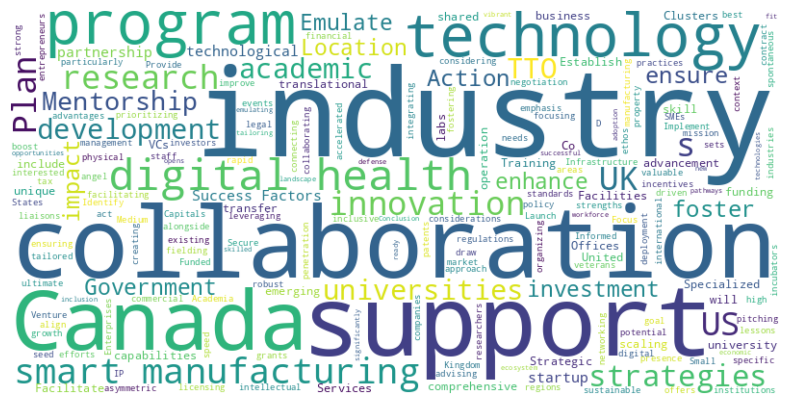

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Defining the text
text = """
Informed by the collaboration strategies between universities and industry in the United Kingdom and the United States, Canada can draw valuable lessons to boost its own collaboration efforts, particularly in the areas of digital health and smart manufacturing. The ultimate goal is to improve the translational impact of academic research and foster a robust collaboration ethos prioritizing technology transfer. Below is a comprehensive plan tailored for Canada, integrating best practices from the UK and US while considering Canada's unique context.

### Specialized Technology Transfer Offices (TTOs)

**Action Plan:**

1. **Establish Specialized TTOs**: Focus on universities with strong programs in digital health and smart manufacturing. These offices will act as liaisons between academic research and industry needs, facilitating patents, licensing, and commercial partnerships.

2. **Training & Development**: Implement comprehensive training programs for TTO staff on intellectual property (IP) management, contract negotiation, and industry-specific regulations to ensure skill sets that align with industry standards.

3. **Government Support**: Secure government funding and policy support to enhance the operation and impact of these TTOs. This could include tax incentives for industries collaborating with universities and grants for translational research.

**Success Factors to Emulate**:
- The UK’s emphasis on mission-driven R&D and investment in technology that supports sustainable and inclusive growth.
- The US's accelerated technology advancement and leveraging of asymmetric advantages in fostering innovation.

### Government-Funded Innovation Clusters

**Action Plan:**

1. **Strategic Location**: Identify regions with the potential for high impact in digital health and smart manufacturing. These should include considerations for existing university research strengths and industry presence.

2. **Co-Location of Facilities**: Facilitate the physical co-location of university research labs and companies to foster spontaneous innovation and collaboration.

3. **Infrastructure & Support Services**: Provide shared facilities such as labs and technology incubators, alongside business services (legal, financial advising) to support startups and SMEs (Small and Medium Enterprises) emerging from these clusters.

**Success Factors to Emulate**:
- The US’s approach to creating and fielding capabilities at speed and scaling, ensuring rapid deployment of innovations.
- The UK's strategic international collaborations, which enhance technological and manufacturing capabilities through shared development.

### Mentorship and Investment Programs

**Action Plan:**

1. **Startup Support Program**: Launch a program that offers both seed funding and mentorship to startups in digital health and smart manufacturing emerging from academic institutions.

2. **Industry-Academia Mentorship**: Establish a mentorship program connecting industry veterans with academic researchers and entrepreneurs, focusing on business development, market penetration strategies, and scaling operations.

3. **Partnership with Venture Capitals (VCs)**: Facilitate partnerships with VCs and angel investors interested in digital health and smart manufacturing, organizing pitching events and networking opportunities.

**Success Factors to Emulate**:
- The US’s vibrant defense innovation ecosystem that fosters collaboration and opens pathways for new technologies.
- The UK’s investment in digital skills and inclusion, which ensures a skilled workforce ready to support technology development and adoption.

### Conclusion

By emulating successful strategies from the UK and US, and tailoring these strategies to fit Canada’s unique economic and technological landscape, Canada can significantly enhance its collaboration between universities and industry, especially in the fast-evolving sectors of digital health and smart manufacturing. These plans should not be static; regular reviews and adjustments will ensure they remain aligned with global technological advancements and Canada's national interests.
"""

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Displaying the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.show()